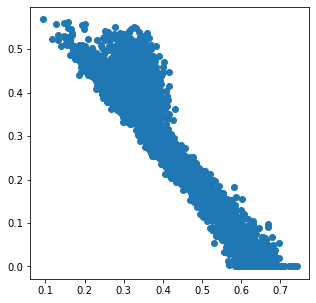

In [2]:
from skimage import io
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np
paint = imread('GMMSegmentTestImage.jpg')
paint_R = paint[:,:,0]*1.0/paint.sum(axis=2)
paint_G = paint[:,:,1]*1.0/paint.sum(axis=2)
plt.figure(figsize=(5,5))
plt.scatter(paint_R.flatten(),paint_G.flatten())

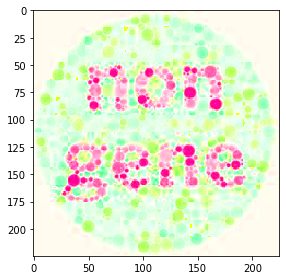

In [15]:
alpha = 255/np.maximum(paint_R,paint_G,1-(paint_R+paint_G))
new_paint = paint 
new_paint[:,:,0] = np.round(alpha*paint_R)
new_paint[:,:,1] = np.round(alpha*paint_G)
new_paint[:,:,2] = np.round(alpha*(1-(paint_R+paint_G)))
io.imshow(new_paint)

In [29]:
img = np.vstack((paint_R.flatten(),paint_G.flatten()))
img2 = img.T
print(img2.shape)
print(img2)

(50625, 2)
[[0.34254144 0.33701657]
 [0.34254144 0.33701657]
 [0.34254144 0.33701657]
 ...
 [0.34254144 0.33701657]
 [0.34254144 0.33701657]
 [0.34254144 0.33701657]]


In [122]:
from sklearn.mixture import GaussianMixture as GMM
gmm_model = GMM(n_components = 5, init_params="kmeans").fit(img2)
print(gmm_model.means_)
print(gmm_model.covariances_)

[[0.3300087  0.34899815]
 [0.46598435 0.2103563 ]
 [0.32128699 0.3991188 ]
 [0.61921557 0.03677344]
 [0.38893366 0.28199879]]
[[[ 0.00024438 -0.00022079]
  [-0.00022079  0.00023175]]

 [[ 0.00188671 -0.00169782]
  [-0.00169782  0.00182456]]

 [[ 0.0012724  -0.00048631]
  [-0.00048631  0.00162957]]

 [[ 0.00148412 -0.00097288]
  [-0.00097288  0.00131984]]

 [[ 0.00087636 -0.00066949]
  [-0.00066949  0.00059981]]]


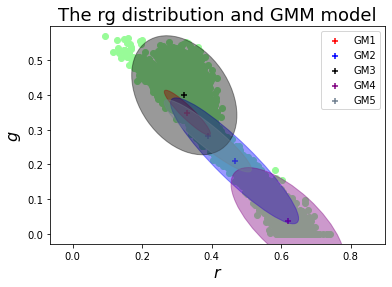

In [123]:
fig,ax = plt.subplots()
import matplotlib as mpl
colors=["red", "blue", "black", "purple", "slategray"]
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        covariances = gmm.covariances_[n][:2, :2]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        # if n==0:
        #     ell = mpl.patches.Ellipse(gmm.means_[n, :2], 7*v[0], 7*v[1],
        #                           180 + angle, color=color)
        # else: 
        #     ell = mpl.patches.Ellipse(gmm.means_[n, :2], 3*v[0], 3*v[1],
        #                           180 + angle, color=color)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], 3*v[0], 3*v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.4)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

make_ellipses(gmm_model, ax)
ax.scatter(paint_R.flatten(), paint_G.flatten(), color = "palegreen")
ax.set_xlabel("$r$", fontsize = 16)
ax.set_ylabel("$g$", fontsize = 16)
ax.set_title("The rg distribution and GMM model", fontsize = 18)
ax.scatter(gmm_model.means_[0][0],gmm_model.means_[0][1], marker="+", color=colors[0], label = "GM1")
ax.scatter(gmm_model.means_[1][0],gmm_model.means_[1][1], marker="+", color=colors[1], label = "GM2")
ax.scatter(gmm_model.means_[2][0],gmm_model.means_[2][1], marker="+", color=colors[2], label = "GM3")
ax.scatter(gmm_model.means_[3][0],gmm_model.means_[3][1], marker="+", color=colors[3], label = "GM4")
ax.scatter(gmm_model.means_[4][0],gmm_model.means_[4][1], marker="+", color=colors[4], label = "GM5")

ax.legend()
plt.show()

In [124]:
print(gmm_model.weights_)

[0.62031007 0.03610493 0.26272721 0.01883558 0.0620222 ]


In [125]:
postProb=gmm_model.predict_proba(img2)
print(postProb.shape)
print(postProb)

(50625, 5)
[[9.86820050e-01 1.10849917e-04 1.16054072e-02 7.34421749e-19
  1.46369276e-03]
 [9.86820050e-01 1.10849917e-04 1.16054072e-02 7.34421749e-19
  1.46369276e-03]
 [9.86820050e-01 1.10849917e-04 1.16054072e-02 7.34421749e-19
  1.46369276e-03]
 ...
 [9.86820050e-01 1.10849917e-04 1.16054072e-02 7.34421749e-19
  1.46369276e-03]
 [9.86820050e-01 1.10849917e-04 1.16054072e-02 7.34421749e-19
  1.46369276e-03]
 [9.86820050e-01 1.10849917e-04 1.16054072e-02 7.34421749e-19
  1.46369276e-03]]


In [131]:
component1_prob=(postProb.T[0]*255.0).reshape((-1,225))
component2_prob=(postProb.T[1]*255.0).reshape((-1,225))
component3_prob=(postProb.T[2]*255.0).reshape((-1,225))
component4_prob=(postProb.T[3]*255.0).reshape((-1,225))
component5_prob=(postProb.T[4]*255.0).reshape((-1,225))
print(component1_prob.shape)
print(component1_prob)

(225, 225)
[[251.63911278 251.63911278 251.63911278 ... 251.63911278 251.63911278
  251.63911278]
 [251.63911278 251.63911278 251.63911278 ... 251.63911278 251.63911278
  251.63911278]
 [251.63911278 251.63911278 251.63911278 ... 251.63911278 251.63911278
  251.63911278]
 ...
 [251.63911278 251.63911278 251.63911278 ... 251.63911278 251.63911278
  251.63911278]
 [251.63911278 251.63911278 251.63911278 ... 251.63911278 251.63911278
  251.63911278]
 [251.63911278 251.63911278 251.63911278 ... 251.63911278 251.63911278
  251.63911278]]


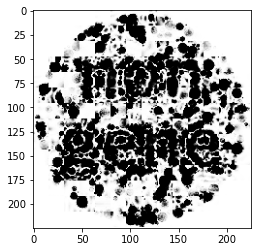

In [133]:
plt.imshow(component1_prob, cmap="gray")

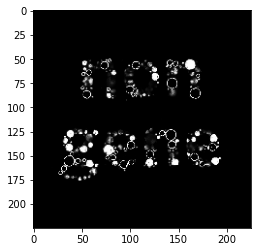

In [134]:
plt.imshow(component2_prob, cmap="gray")

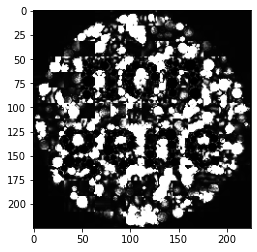

In [135]:
plt.imshow(component3_prob, cmap="gray")

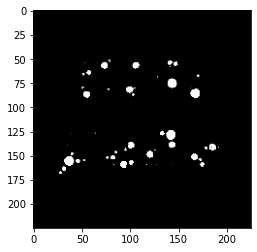

In [136]:
plt.imshow(component4_prob, cmap="gray")

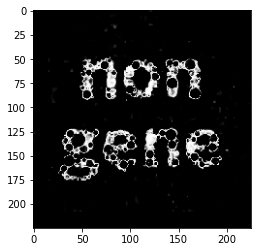

In [137]:
plt.imshow(component5_prob, cmap="gray")